<a href="https://colab.research.google.com/github/nagamachia/Signate/blob/master/kokoro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Mecabのインストール
!pip install mecab-python3

     |████████████████████████████████| 17.1MB 235kB/s 


In [ ]:
#MeCabで形態素解析
import MeCab
mecab = MeCab.Tagger('-Ochasen')
data = mecab.parse('能ある鷹なので，爪を隠しきれていません')
print(data)

能	ノウ	能	名詞-一般		
ある	アル	ある	動詞-自立	五段・ラ行	基本形
鷹	タカ	鷹	名詞-一般		
な	ナ	だ	助動詞	特殊・ダ	体言接続
ので	ノデ	ので	助詞-接続助詞		
，	，	，	記号-読点		
爪	ツメ	爪	名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
隠し	カクシ	隠す	動詞-自立	五段・サ行	連用形
きれ	キレ	きれる	動詞-非自立	一段	連用形
て	テ	て	助詞-接続助詞		
い	イ	いる	動詞-非自立	一段	連用形
ませ	マセ	ます	助動詞	特殊・マス	未然形
ん	ン	ん	助動詞	不変化型	基本形
EOS



In [ ]:
#日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,820 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-g

In [ ]:
#こころのテキストデータ（zipファイル）をダウンロード
!curl -O "https://www.aozora.gr.jp/cards/000148/files/773_ruby_5968.zip"
#zipファイルを解凍
!unzip 773_ruby_5968.zip
#文章のみ切り出し
!sed -n 23,1579p kokoro.txt > kokoro_data.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  150k  100  150k    0     0   176k      0 --:--:-- --:--:-- --:--:--  176k
Archive:  773_ruby_5968.zip
Made with MacWinZipper™
  inflating: kokoro.txt              


In [ ]:
#テキストファイル読み込み
text_file = open('/content/kokoro_data.txt',encoding = 'shift_jis')
contents = text_file.read()

In [ ]:
import MeCab
from wordcloud import WordCloud
from collections import Counter

#MeCabで形態素解析
mecab = MeCab.Tagger('-Ochasen')
node = mecab.parseToNode(contents)
words = []

while node is not None:

    #品詞と品詞細分類１を抽出
    pos_type = node.feature.split(',')[0]
    subtype = node.feature.split(',')[1]

    #品詞が名詞、品詞細分類１が一般のとき
    if pos_type in ['名詞']:
        if subtype in ['一般']:
            words.append(node.surface)

    node = node.next

#出現回数を集計し、最頻順にソート
words_count = Counter(words)
result = words_count.most_common()

#出現回数結果の画面出力
for word, cnt in result:
    print(word, cnt)

先生 597
奥さん 388
父 272
自分 264
い 234
人 173
母 171
お嬢さん 166
顔 128
言葉 128
眼 123
うち 118
下げ 111
見出し 111
妻 108
心 102
間 90
口 88
通り 82
あと 78
女 77
手 75
宅 75
頭 74
手紙 74
家 73
外 71
人間 71
叔父 70
気 67
室 67
男 66
兄 62
様子 61
声 59
心持 57
態度 54
ひと 46
先 43
傍 41
一つ 40
風 40
いっしょ 40
他 40
胸 40
め 39
調子 39
へや 38
学校 37
眺 35
書物 35
医者 35
身体 34
世の中 34
こ 33
気分 33
例 30
下 30
友達 29
恋 29
世間 28
機会 28
向う 28
力 28
そば 28
財産 28
代り 27
墓 26
考え 25
机 25
一種 24
相手 24
ただ 24
時分 24
好 24
耳 24
お父さん 24
金 23
経 23
色 23
止 23
自身 23
さい 23
子供 23
事 23
床 23
たま 22
海 22
最後 22
淋 22
田舎 22
底 21
めし 21
襖 21
国 21
おじ 21
電報 20
元 20
す 20
足 20
感じ 20
空 20
ょ 20
座敷 20
念 20
もと 19
目的 19
最初 19
花 19
貰 19
余裕 19
事件 19
病人 19
玄関 18
下女 18
名 18
影 18
飯 18
席 18
地位 17
道 17
上 17
まくら 17
みち 16
腹の中 16
ぎり 16
答え 16
大学 16
いち 16
茶の間 16
いなか 16
ろ 16
夏 16
年 15
客 15
問い 15
だい 15
理由 15
平気 15
性質 15
妹 15
しょ 15
運命 15
新聞 15
愛 15
境遇 14
事情 14
次 14
ちょう 14
利 14
裏 14
夫 14
神経 14
勇気 14
お母さん 14
庭 14
わ 14
都合 14
とこ 14
枕元 14
養家 14
筆 13
帽子 13
ぎ 13
着物 13
ぼう 13
光 13
家族 13
学生 13
ぞう 13
奥 13
さび 13
食卓 13
いも 13
音 

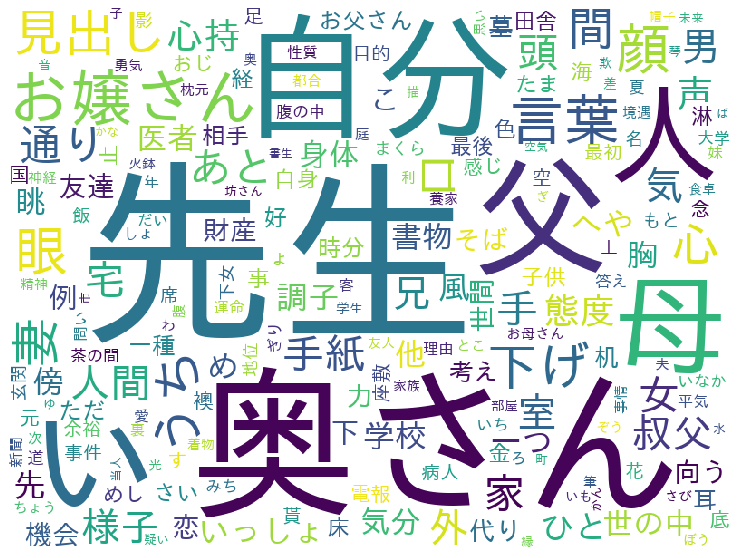

In [ ]:
#wordcloud取込用に辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
width=800,height=600).fit_words(dic_result)

#生成した画像の表示
import matplotlib.pyplot as plt 
from matplotlib import rcParams

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()